In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

import plotly.express as px
import plotly.graph_objects as go


In [2]:
responses = pd.read_csv("kaggle_survey_2021_responses.csv", low_memory=False)

In [6]:
responses = responses[1:].reset_index(drop=True)
responses['Nigeria'] = responses['Q3'] == 'Nigeria'

In [7]:
i=1
temp = responses[['Nigeria', f'Q42_Part_{i}']]
temp

,Nigeria,Q42_Part_1
0,False,NaN
1,False,NaN
2,False,NaN
3,False,NaN
4,False,NaN
...,...,...
25966,False,NaN
25967,False,NaN
25968,False,NaN
25969,False,NaN


In [8]:
temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()
temp

<ipython-input-8-07f9fd0930a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()


,Nigeria,Q42_Part_1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
25966,False,False
25967,False,False
25968,False,False
25969,False,False


In [9]:
temp = temp.groupby('Nigeria')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()

temp

Q42_Part_1
Nigeria Q42_Part_1            
False   False         0.858443
        True          0.141557
True    False         0.757835
        True          0.242165

In [10]:
media_sources = ['Twitter', 'Newsletters', 'Reddit', 'Kaggle', 'Course Forums', 'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities']
temp.columns = [media_sources[i-1]]
temp

Twitter
Nigeria Q42_Part_1          
False   False       0.858443
        True        0.141557
True    False       0.757835
        True        0.242165

In [11]:
temp = temp.reset_index(drop=False)
temp

,Nigeria,Q42_Part_1,Twitter
0,False,False,0.858443
1,False,True,0.141557
2,True,False,0.757835
3,True,True,0.242165


In [12]:
df = temp[[media_sources[i-1]]].copy()

In [13]:
df

,Twitter
0,0.858443
1,0.141557
2,0.757835
3,0.242165


In [15]:
for i in range(2,11):
    temp = responses[['Nigeria', f'Q42_Part_{i}']]
    temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

<ipython-input-15-1df212b96a63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()


In [16]:
temp

,Nigeria,Q42_Part_10
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
25966,False,True
25967,False,False
25968,False,False
25969,False,False


In [17]:
temp = temp.groupby('Nigeria')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()

In [18]:
temp

Q42_Part_10
Nigeria Q42_Part_10             
False   False           0.925957
        True            0.074043
True    False           0.823362
        True            0.176638

In [19]:
temp.columns = [media_sources[i-1]]

In [20]:
temp

Slack Communities
Nigeria Q42_Part_10                   
False   False                 0.925957
        True                  0.074043
True    False                 0.823362
        True                  0.176638

In [21]:
temp = temp.reset_index(drop=False)

In [22]:
temp

,Nigeria,Q42_Part_10,Slack Communities
0,False,False,0.925957
1,False,True,0.074043
2,True,False,0.823362
3,True,True,0.176638


In [23]:
temp  = temp[temp[f'Q42_Part_{i}'] == True]

In [24]:
temp

,Nigeria,Q42_Part_10,Slack Communities
1,False,True,0.074043
3,True,True,0.176638


In [25]:
df = pd.concat([df, temp[media_sources[i-1]]], axis=1)

In [26]:
df

,Twitter,Slack Communities
0,0.858443,NaN
1,0.141557,0.074043
2,0.757835,NaN
3,0.242165,0.176638


In [27]:
df = df*100

In [28]:
df

,Twitter,Slack Communities
0,85.844315,NaN
1,14.155685,7.404329
2,75.783476,NaN
3,24.216524,17.663818


In [29]:
labels = df.columns.values
y1 = df.loc[1].values
y2 = df.loc[3].values

In [34]:
# Color palette
other_color = "gold"
nigerian_color = "green"

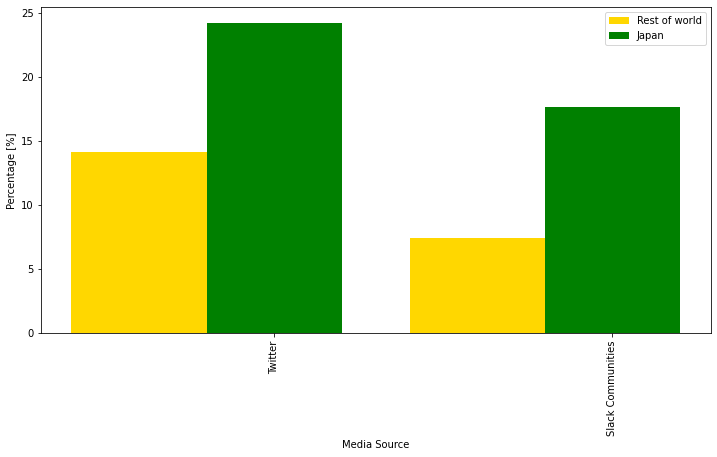

In [36]:
width = 0.4  

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))

rects1 = ax.bar(x -width, y1, width, label='Rest of world', color=other_color)
rects2 = ax.bar(x, y2, width, label='Japan', color=nigerian_color)

plt.xlabel("Media Source")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()

<ipython-input-42-a2edcf60bd3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()
<ipython-input-42-a2edcf60bd3c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()
<ipython-input-42-a2edcf60bd3c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

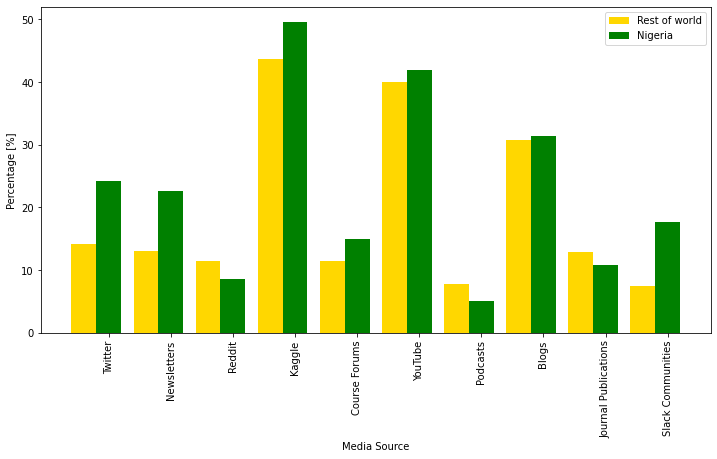

In [42]:
media_sources = ['Twitter', 'Newsletters', 'Reddit',
                 'Kaggle', 'Course Forums', 'YouTube', 
                 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities']
i=1 
temp = responses[['Nigeria', f'Q42_Part_{i}']]
temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

temp = temp.groupby('Nigeria')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()
temp.columns = [media_sources[i-1]]
temp = temp.reset_index(drop=False)
temp  = temp[temp[f'Q42_Part_{i}'] == True]
df = temp[[media_sources[i-1]]].copy()

for i in range(2,11):
    temp = responses[['Nigeria', f'Q42_Part_{i}']]
    temp[f'Q42_Part_{i}'] = temp[f'Q42_Part_{i}'].notna()

    temp = temp.groupby('Nigeria')[f'Q42_Part_{i}'].value_counts(normalize=True).to_frame()
    temp.columns = [media_sources[i-1]]
    temp = temp.reset_index(drop=False)
    temp  = temp[temp[f'Q42_Part_{i}'] == True]
    
    df = pd.concat([df, temp[media_sources[i-1]]], axis=1)

df = df*100

labels = df.columns.values
y1 = df.loc[1].values
y2 = df.loc[3].values

width = 0.4  

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))

rects1 = ax.bar(x -width, y1, width, label='Rest of world', color=other_color)
rects2 = ax.bar(x, y2, width, label='Nigeria', color=nigerian_color)

plt.xlabel("Media Source")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()

<ipython-input-45-62dff990bfc5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'Q7_Part_{i}'] = temp[f'Q7_Part_{i}'].notna()
<ipython-input-45-62dff990bfc5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[f'Q7_Part_{i}'] = temp[f'Q7_Part_{i}'].notna()
<ipython-input-45-62dff990bfc5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

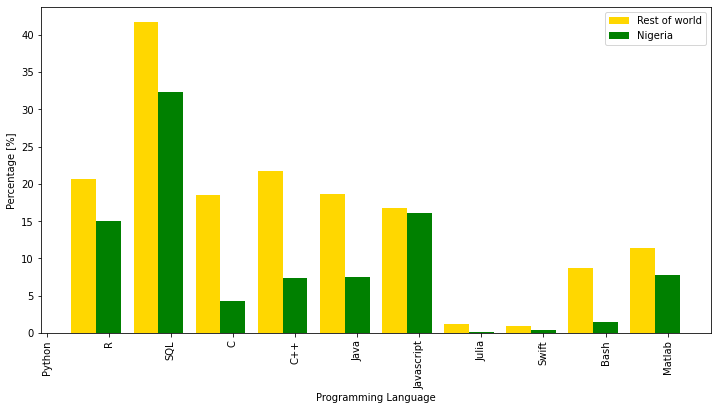

In [45]:
media_sources = ['Python', 'R', 
                 'SQL', 'C',
                 'C++', 'Java',
                 'Javascript', 'Julia',
                 'Swift', 'Bash', 'Matlab']
i=1 
temp = responses[['Nigeria', f'Q7_Part_{i}']]
temp[f'Q7_Part_{i}'] = temp[f'Q7_Part_{i}'].notna()

temp = temp.groupby('Nigeria')[f'Q7_Part_{i}'].value_counts(normalize=True).to_frame()
temp.columns = [media_sources[i-1]]
temp = temp.reset_index(drop=False)
temp  = temp[temp[f'Q7_Part_{i}'] == True]
df = temp[[media_sources[i-1]]].copy()

for i in range(2,12):
    temp = responses[['Nigeria', f'Q7_Part_{i}']]
    temp[f'Q7_Part_{i}'] = temp[f'Q7_Part_{i}'].notna()

    temp = temp.groupby('Nigeria')[f'Q7_Part_{i}'].value_counts(normalize=True).to_frame()
    temp.columns = [media_sources[i-1]]
    temp = temp.reset_index(drop=False)
    temp  = temp[temp[f'Q7_Part_{i}'] == True]
    
    df = pd.concat([df, temp[media_sources[i-1]]], axis=1)

df = df*100

labels = df.columns.values
y1 = df.loc[1].values
y2 = df.loc[3].values

width = 0.4  

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

x = np.arange(len(labels))

rects1 = ax.bar(x -width, y1, width, label='Rest of world', color=other_color)
rects2 = ax.bar(x, y2, width, label='Nigeria', color=nigerian_color)

plt.xlabel("Programming Language")
plt.ylabel("Percentage [%]")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
plt.legend()
plt.show()